In [2]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 7]

In [51]:
url = r'''C:\Users\jamwa\Downloads\tsla.csv'''

columns = ['Date','Open','High','Low','Close','Adj Close','Volume']

df = pd.read_csv(url, header=0)
#df.columns = columns
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2813 non-null   object 
 1   Open       2813 non-null   float64
 2   High       2813 non-null   float64
 3   Low        2813 non-null   float64
 4   Close      2813 non-null   float64
 5   Adj Close  2813 non-null   float64
 6   Volume     2813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 154.0+ KB


In [54]:
df.memory_usage()

Index          128
Date         22504
Open         22504
High         22504
Low          22504
Close        22504
Adj Close    22504
Volume       22504
dtype: int64

In [55]:
df.memory_usage().sum()

157656

In [56]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2.813000e+03
mean,98.307804,100.386953,96.069256,98.349877,98.349877,3.160441e+07
std,176.108180,179.847860,171.937613,176.160413,176.160413,2.857384e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,8.838000,9.228000,8.782000,9.090000,9.090000,1.232800e+07
50%,45.720001,46.307999,44.908001,45.664001,45.664001,2.513300e+07
75%,63.998001,65.334000,63.014000,64.269997,64.269997,4.050650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [57]:
df.mean()

Open         9.830780e+01
High         1.003870e+02
Low          9.606926e+01
Close        9.834988e+01
Adj Close    9.834988e+01
Volume       3.160441e+07
dtype: float64

In [58]:
df.var()

Open         3.101409e+04
High         3.234525e+04
Low          2.956254e+04
Close        3.103249e+04
Adj Close    3.103249e+04
Volume       8.164646e+14
dtype: float64

In [59]:
df.skew()

Open         2.821972
High         2.812831
Low          2.830220
Close        2.820368
Adj Close    2.820368
Volume       2.262218
dtype: float64

In [60]:
df.kurtosis()

Open         6.885320
High         6.821455
Low          6.944914
Close        6.873660
Adj Close    6.873660
Volume       8.854525
dtype: float64

In [61]:
df.min()

Date         2010-06-29
Open              3.228
High              3.326
Low               2.996
Close              3.16
Adj Close          3.16
Volume           592500
dtype: object

In [62]:
df.max()

Date         2021-08-30
Open         891.380005
High         900.400024
Low          871.599976
Close        883.090027
Adj Close    883.090027
Volume        304694000
dtype: object

In [63]:
df.median()

Open         4.572000e+01
High         4.630800e+01
Low          4.490800e+01
Close        4.566400e+01
Adj Close    4.566400e+01
Volume       2.513300e+07
dtype: float64

In [64]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999740,0.999666,0.999371,0.999371,0.174808
High,0.999740,1.000000,0.999594,0.999751,0.999751,0.179915
Low,0.999666,0.999594,1.000000,0.999654,0.999654,0.169714
Close,0.999371,0.999751,0.999654,1.000000,1.000000,0.175873
Adj Close,0.999371,0.999751,0.999654,1.000000,1.000000,0.175873
Volume,0.174808,0.179915,0.169714,0.175873,0.175873,1.000000


In [65]:
import seaborn as sns

<AxesSubplot:>

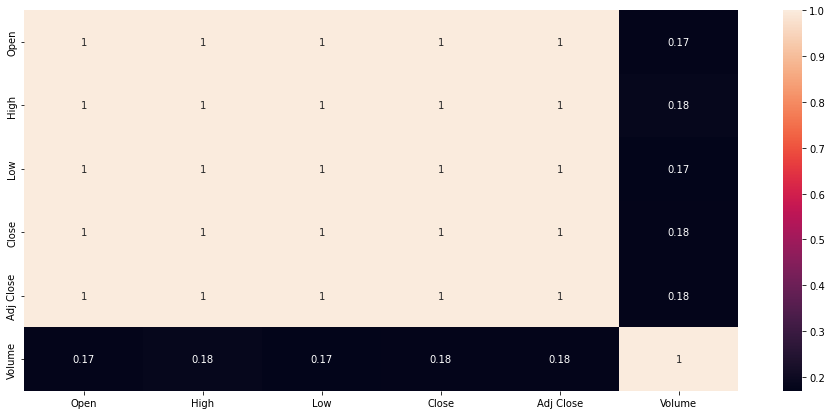

In [66]:
sns.heatmap(df.corr(), annot=True)

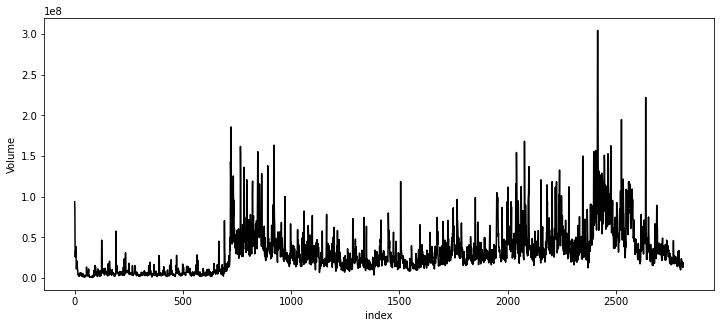

In [80]:
df['Volume'].plot(figsize=(12, 5), color='black') # color and figsize changed

#plt.xlim(0, 305000000) # range for x-axis
#plt.ylim(0, 305000000) # range for x-axis
plt.xlabel('index')
plt.ylabel('Volume'); # ";" prevents object info from displaying

<AxesSubplot:xlabel='Low', ylabel='High'>

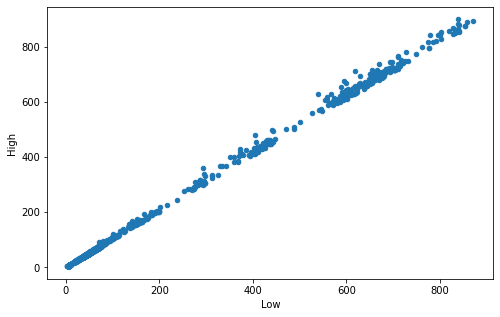

In [77]:
df.plot.scatter('Low', 'High', figsize=(8, 5))

<AxesSubplot:>

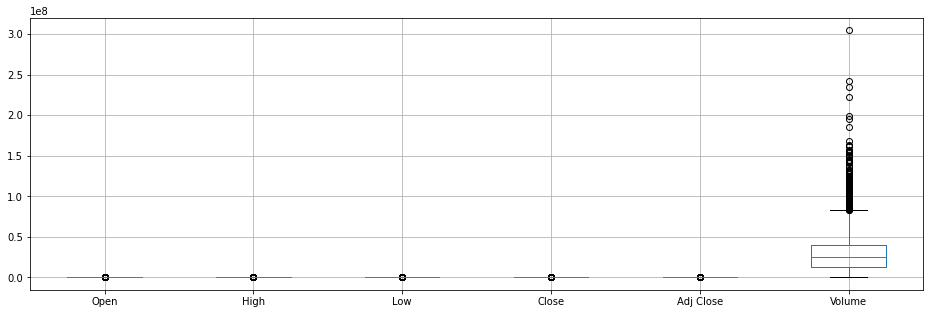

In [81]:
df.boxplot(figsize=(16, 5))

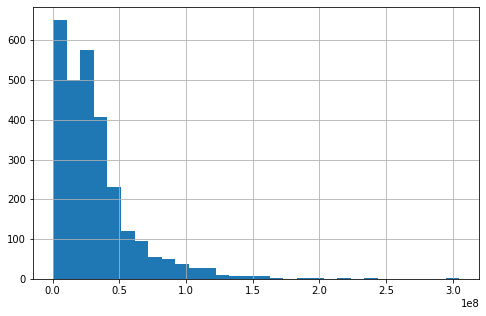

In [82]:
df['Volume'].hist(bins=30, figsize=(8, 5));

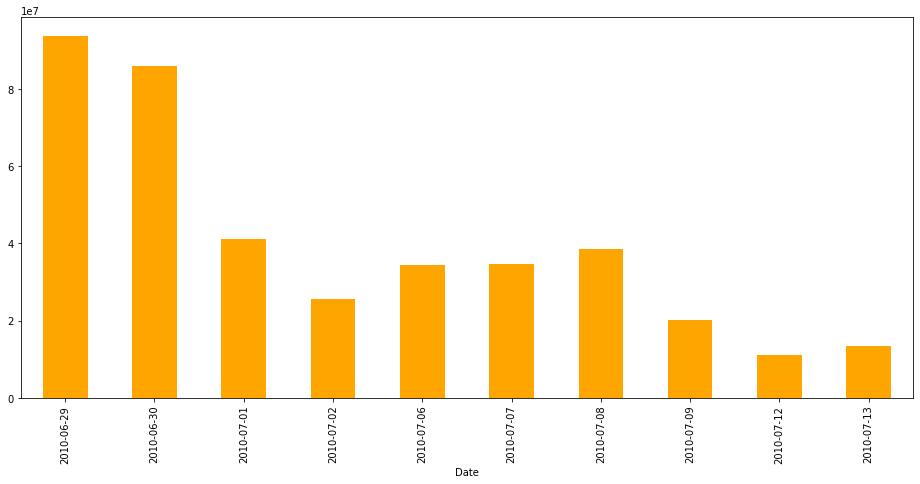

In [85]:
df_avg_BP = df.groupby('Date')['Volume'].mean()
df_avg_BP[:10].plot.bar(color='orange');

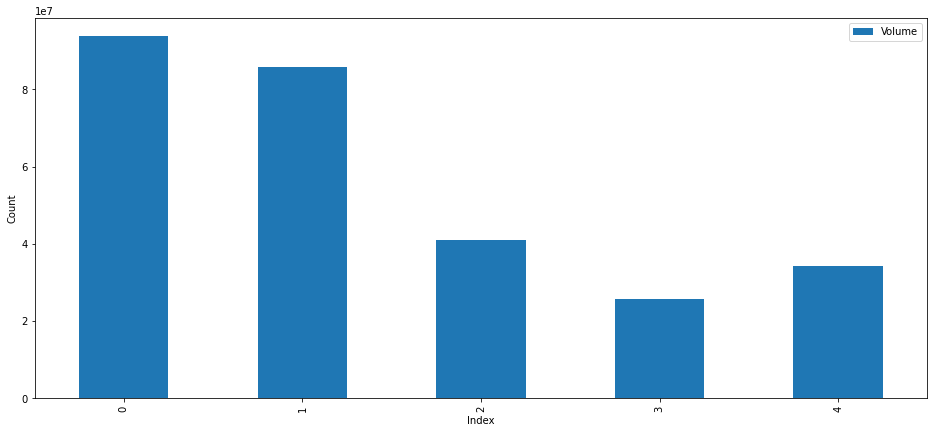

In [86]:
ax = df[['Date', 'Volume']][:5].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");